In [1]:
from google.colab import drive
import numpy as np
from sklearn.linear_model import Perceptron
import os
import cv2
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
assert tf.__version__ >= "2.0"
from tensorflow import keras
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
drive.mount("/content/drive", force_remount=True)
data_path_train = "/content/drive/Shareddrives/PokémonSerina/Train_Validation_Pokémon"
data_path_test = "/content/drive/Shareddrives/PokémonSerina/Test_Pokémon"

Mounted at /content/drive


In [3]:
dirs = os.listdir(data_path_train)
sprites_train=[]


for folder in dirs:
 dirs_2= os.listdir(data_path_train+'/'+folder)
 print(folder) 
 for path in dirs_2:
   sprite= cv2.imread(data_path_train+'/'+folder+'/'+path)
   arr = [sprite, folder]
   sprites_train.append(arr)

print('- Fine Elaborazione -')

1.Bulbasaur
2.Ivysaur
3.Venusaur
7.Squirtle
10.Caterpie
151.Mew
12.Butterfree
13.Weedle
9.Blastoise
6.Charizard
8.Wartortle
11.Metapod
5.Charmaleon
15.Beedrill
14.Kakuna
17.Pidgeotto
22.Fearow
21.Spearow
18.Pidgeot
20.Raticate
23.Ekans
16.Pidgey
19.Rattata
25.Pikachu
32.Nidoran_m
26.Raichu
33.Nidorino
27.Sandshrew
24.Arbok
31.Nidoqueen
30.Nidorina
29.Nidoran_f
38.Ninetales
41.Zubat
40.Wigglytuff
37.Vulpix
34.Nidoking
43.Oddish
36.Clefable
42.Golbat
39.Jigglypuff
35.Clefairy
47.Parasect
52.Meowth
51.Dugtrio
45.Vileplume
49.Venomoth
48.Venonat
53.Persian
46.Paras
50.Diglett
44.Gloom
61.Poliwhirl
56.Mankey
55.Golduck
54.Psyduck
62.Poliwrath
59.Arcanine
57.Primeape
63.Abra
58.Growlithe
60.Poliwag
71.Victreebell
72.Tentacool
67.Machoke
70.Weepinbell
68.Machamp
73.Tentacruel
65.Alakazam
66.Machop
64.Kadabra
69.Bellsprout
80.Slowbro
74.Geodude
76.Golem
81.Magnemite
75.Graveler
79.Slowpoke
77.Ponyta
83.Farfetch'd
78.Rapidash
82.Magneton
93.Haunter
92.Gastly
89.Muk
90.Shellder
91.Cloyster
86.Se

In [4]:

dirs = os.listdir(data_path_test)
sprites_test=[]


for folder in dirs:
 dirs_2= os.listdir(data_path_test+'/'+folder)
 print(folder) 
 for path in dirs_2:
   sprite= cv2.imread(data_path_test+'/'+folder+'/'+path)
   arr = [sprite, folder] 
   sprites_test.append(arr)

print('- Fine Elaborazione -')



1.Bulbasaur
2.Ivysaur
3.Venusaur
7.Squirtle
10.Caterpie
151.Mew
12.Butterfree
13.Weedle
9.Blastoise
6.Charizard
8.Wartortle
11.Metapod
5.Charmaleon
15.Beedrill
14.Kakuna
17.Pidgeotto
22.Fearow
21.Spearow
18.Pidgeot
20.Raticate
23.Ekans
16.Pidgey
19.Rattata
25.Pikachu
32.Nidoran_m
26.Raichu
33.Nidorino
27.Sandshrew
24.Arbok
31.Nidoqueen
30.Nidorina
29.Nidoran_f
38.Ninetales
41.Zubat
40.Wigglytuff
37.Vulpix
34.Nidoking
43.Oddish
36.Clefable
42.Golbat
39.Jigglypuff
35.Clefairy
47.Parasect
52.Meowth
51.Dugtrio
45.Vileplume
49.Venomoth
48.Venonat
53.Persian
46.Paras
50.Diglett
44.Gloom
61.Poliwhirl
56.Mankey
55.Golduck
54.Psyduck
62.Poliwrath
59.Arcanine
57.Primeape
63.Abra
58.Growlithe
60.Poliwag
71.Victreebell
72.Tentacool
67.Machoke
70.Weepinbell
68.Machamp
73.Tentacruel
65.Alakazam
66.Machop
64.Kadabra
69.Bellsprout
80.Slowbro
74.Geodude
76.Golem
81.Magnemite
75.Graveler
79.Slowpoke
77.Ponyta
83.Farfetch'd
78.Rapidash
82.Magneton
93.Haunter
92.Gastly
89.Muk
90.Shellder
91.Cloyster
86.Se

In [129]:

# [image, label]

sprites_train = np.array(sprites_train, dtype=object)
sprites_test = np.array(sprites_test, dtype=object)
sprites_permuted_train = np.random.permutation(sprites_train)
sprites_permuted_test = np.random.permutation(sprites_test)

In [130]:
sprites_permuted_train.shape[0]

7947

In [131]:
y_train_full = []
X_train_full = []

for sprite_name in range(sprites_permuted_train.shape[0]):
  y_train_full.append(sprites_permuted_train[sprite_name][1])
print(y_train_full)

for sprite_name in range(sprites_permuted_train.shape[0]):
  X_train_full.append(sprites_permuted_train[sprite_name][0])
print(X_train_full)

['128.Tauros', '67.Machoke', '147.Dratini', '78.Rapidash', '65.Alakazam', '76.Golem', '63.Abra', '144.Articuno', '120.Staryu', '72.Tentacool', '64.Kadabra', '95.Onix', '76.Golem', '51.Dugtrio', '70.Weepinbell', '39.Jigglypuff', '99.Kingler', '15.Beedrill', '88.Grimer', '59.Arcanine', '53.Persian', '18.Pidgeot', '70.Weepinbell', '68.Machamp', '110.Weezing', '111.Rhyhorn', '75.Graveler', '32.Nidoran_m', '25.Pikachu', '1.Bulbasaur', '47.Parasect', '44.Gloom', '17.Pidgeotto', '145.Zapdos', '53.Persian', '109.Koffing', '142.Aerodactyl', '45.Vileplume', '18.Pidgeot', '149.Dragonite', '43.Oddish', '17.Pidgeotto', '1.Bulbasaur', '67.Machoke', '56.Mankey', '147.Dratini', '131.Lapras', '148.Dragonair', '138.Omanyte', '98.Krabby', '84.Doduo', '109.Koffing', '134.Vaporeon', '114.Tangela', '87.Dewgong', '135.Jolteon', '148.Dragonair', '68.Machamp', '47.Parasect', '148.Dragonair', '93.Haunter', '91.Cloyster', '30.Nidorina', '37.Vulpix', '66.Machop', '115.Kangaskhan', '43.Oddish', '93.Haunter', '13.W

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [132]:
y_test = []
X_test = []

for sprite_name in range(sprites_permuted_test.shape[0]):
  y_test.append(sprites_permuted_test[sprite_name][1])
print(y_test)

for sprite_name in range(sprites_permuted_test.shape[0]):
  X_test.append(sprites_permuted_test[sprite_name][0])
print(X_test)

Output streaming troncato alle ultime 5000 righe.

       [[255, 255, 255],
        [255, 255, 255],
        [253, 253, 253],
        ...,
        [253, 255, 255],
        [247, 249, 249],
        [252, 254, 254]]], dtype=uint8), array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [

In [133]:
len(X_test)

1912

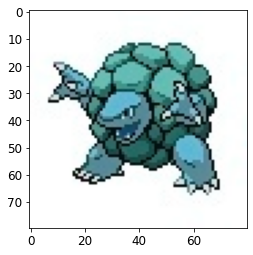

In [134]:
plt.imshow(X_train_full[5])


In [135]:
X_train_full = np.array(X_train_full, dtype ='uint8')
X_test = np.array(X_test, dtype ='uint8')

In [136]:

print(X_train_full.shape)

(7947, 80, 80, 3)


In [137]:
X_train_full.dtype

dtype('uint8')

In [138]:
X_valid, X_train = X_train_full[:800] / 255., X_train_full[800:] / 255.
y_valid, y_train = y_train_full[:800], y_train_full[800:]
X_test = X_test / 255.

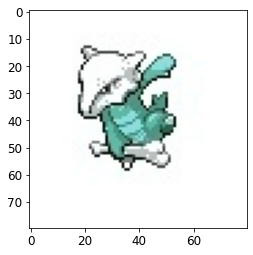

In [139]:
plt.imshow(X_train[3], cmap="binary")
plt.axis('on')
plt.show()

In [140]:
X_valid.shape

(800, 80, 80, 3)

In [141]:
y_valid

['128.Tauros',
 '67.Machoke',
 '147.Dratini',
 '78.Rapidash',
 '65.Alakazam',
 '76.Golem',
 '63.Abra',
 '144.Articuno',
 '120.Staryu',
 '72.Tentacool',
 '64.Kadabra',
 '95.Onix',
 '76.Golem',
 '51.Dugtrio',
 '70.Weepinbell',
 '39.Jigglypuff',
 '99.Kingler',
 '15.Beedrill',
 '88.Grimer',
 '59.Arcanine',
 '53.Persian',
 '18.Pidgeot',
 '70.Weepinbell',
 '68.Machamp',
 '110.Weezing',
 '111.Rhyhorn',
 '75.Graveler',
 '32.Nidoran_m',
 '25.Pikachu',
 '1.Bulbasaur',
 '47.Parasect',
 '44.Gloom',
 '17.Pidgeotto',
 '145.Zapdos',
 '53.Persian',
 '109.Koffing',
 '142.Aerodactyl',
 '45.Vileplume',
 '18.Pidgeot',
 '149.Dragonite',
 '43.Oddish',
 '17.Pidgeotto',
 '1.Bulbasaur',
 '67.Machoke',
 '56.Mankey',
 '147.Dratini',
 '131.Lapras',
 '148.Dragonair',
 '138.Omanyte',
 '98.Krabby',
 '84.Doduo',
 '109.Koffing',
 '134.Vaporeon',
 '114.Tangela',
 '87.Dewgong',
 '135.Jolteon',
 '148.Dragonair',
 '68.Machamp',
 '47.Parasect',
 '148.Dragonair',
 '93.Haunter',
 '91.Cloyster',
 '30.Nidorina',
 '37.Vulpix',


In [142]:
X_test.shape

(1912, 80, 80, 3)

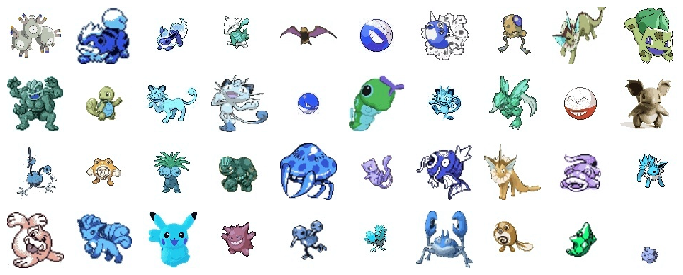

In [143]:

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        #plt.title(class_names[y_train[index]], fontsize=12)
#plt.subplots_adjust(wspace=0.2, hspace=0.5)
#save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [144]:
y_test

['81.Magnemite',
 '84.Doduo',
 '138.Omanyte',
 '79.Slowpoke',
 '132.Ditto',
 '119.Seaking',
 '33.Nidorino',
 '140.Kabuto',
 '40.Wigglytuff',
 '121.Starmie',
 '66.Machop',
 '136.Flareon',
 '148.Dragonair',
 '113.Chansey',
 '50.Diglett',
 '7.Squirtle',
 '123.Scyther',
 '77.Ponyta',
 '63.Abra',
 '71.Victreebell',
 '50.Diglett',
 '59.Arcanine',
 '6.Charizard',
 '94.Gengar',
 '65.Alakazam',
 '141.Kabutops',
 '108.Likitung',
 '8.Wartortle',
 '90.Shellder',
 '26.Raichu',
 '23.Ekans',
 '92.Gastly',
 '39.Jigglypuff',
 '150.Mewtwo',
 '58.Growlithe',
 '44.Gloom',
 '116.Horsea',
 '2.Ivysaur',
 '95.Onix',
 '104.Cubone',
 '126.Magmar',
 '103.Exeggutor',
 '34.Nidoking',
 '135.Jolteon',
 '82.Magneton',
 '95.Onix',
 '65.Alakazam',
 '108.Likitung',
 '28.Sandslash',
 '47.Parasect',
 '79.Slowpoke',
 '89.Muk',
 '17.Pidgeotto',
 '135.Jolteon',
 '70.Weepinbell',
 '134.Vaporeon',
 '40.Wigglytuff',
 '136.Flareon',
 '146.Moltres',
 '128.Tauros',
 '9.Blastoise',
 '127.Pinsir',
 '147.Dratini',
 '117.Seadra',
 '14

In [145]:
import re

pattern = '[0-9]+'


numeri = []
for text in y_train:
  match = re.search(pattern, text)
  s = match.start()
  e = match.end()
  numeri.append(int(text[s:e])-1)
y_train = numeri
print(y_train)

numeri = []
for text in y_test:
  match = re.search(pattern, text)
  s = match.start()
  e = match.end()
  numeri.append(int(text[s:e])-1)
y_test = numeri
print(y_test)

numeri = []
for text in y_valid:
  match = re.search(pattern, text)
  s = match.start()
  e = match.end()
  numeri.append(int(text[s:e])-1)
y_valid = numeri
print(y_valid)

[81, 57, 135, 104, 41, 100, 118, 71, 133, 0, 67, 6, 52, 51, 99, 9, 51, 122, 100, 29, 83, 60, 102, 66, 46, 150, 128, 133, 78, 134, 85, 36, 24, 93, 83, 20, 97, 59, 10, 34, 61, 37, 64, 134, 30, 135, 54, 48, 10, 111, 44, 86, 25, 22, 36, 93, 0, 14, 106, 80, 80, 125, 72, 111, 4, 76, 121, 126, 45, 12, 106, 4, 4, 46, 125, 30, 45, 141, 27, 108, 24, 51, 46, 144, 103, 82, 57, 70, 146, 131, 42, 130, 102, 3, 97, 135, 127, 47, 40, 97, 52, 49, 80, 114, 136, 30, 97, 9, 15, 104, 3, 57, 118, 104, 103, 100, 108, 139, 67, 53, 18, 73, 94, 130, 24, 142, 94, 3, 109, 83, 94, 46, 63, 84, 92, 121, 89, 139, 89, 14, 149, 18, 140, 11, 23, 149, 138, 66, 34, 50, 70, 38, 92, 13, 63, 24, 6, 13, 51, 116, 14, 101, 22, 24, 49, 76, 75, 134, 10, 60, 88, 102, 89, 80, 83, 87, 110, 122, 59, 137, 111, 133, 15, 146, 109, 53, 64, 35, 65, 108, 51, 94, 113, 121, 56, 88, 131, 16, 17, 33, 123, 103, 136, 131, 7, 87, 65, 141, 130, 3, 43, 84, 27, 85, 64, 6, 131, 25, 124, 43, 56, 66, 24, 150, 102, 24, 99, 82, 19, 35, 43, 29, 108, 30, 10

In [146]:
y_train = np.array(y_train, dtype ='uint8')
y_test = np.array(y_test, dtype ='uint8')
y_valid = np.array(y_valid, dtype ='uint8')

In [147]:
y_test

array([ 80,  83, 137, ...,  64,  10,  14], dtype=uint8)

In [148]:
X_test.shape

(1912, 80, 80, 3)

In [149]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[80, 80, 3]))
keras.layers.Dropout(rate=0.4)
model.add(keras.layers.Dense(3200, activation="relu"))
keras.layers.Dropout(rate=0.4)
model.add(keras.layers.Dense(1600, activation="relu"))
keras.layers.Dropout(rate=0.4)
model.add(keras.layers.Dense(151, activation="softmax"))

In [150]:
#model.summary()

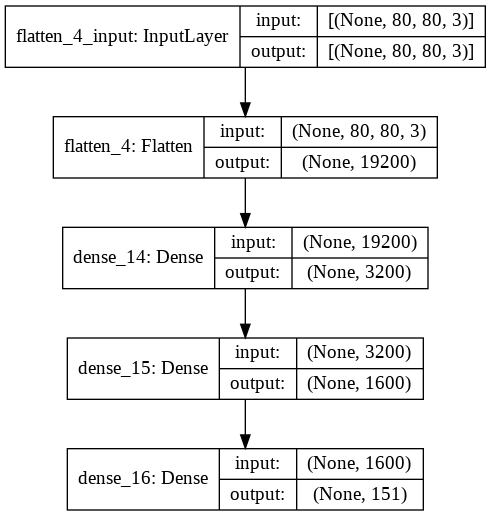

In [151]:
keras.utils.plot_model(model, show_shapes=True)

In [152]:
hidden1 = model.layers[1]
hidden1.name

'dense_14'

In [153]:
model.get_layer(hidden1.name) is hidden1

True

In [154]:
weights, biases = hidden1.get_weights()
print(weights)
print(weights.shape)
print(biases)
print(biases.shape)

[[-0.01201295 -0.00290249  0.01621459 ...  0.00442998 -0.00065933
  -0.00075043]
 [ 0.01435064 -0.01330316 -0.00901774 ... -0.0110695  -0.00520795
  -0.00931158]
 [-0.00510159 -0.01568645 -0.01179026 ... -0.01204276 -0.00104766
   0.00386565]
 ...
 [-0.00375539  0.00152779 -0.01302313 ... -0.00618988 -0.00989066
  -0.00545803]
 [-0.00438395 -0.01619805  0.01539176 ... -0.01547051 -0.01438367
   0.00534606]
 [ 0.01503315 -0.01308765 -0.00884037 ...  0.01576283  0.01397572
   0.01216807]]
(19200, 3200)
[0. 0. 0. ... 0. 0. 0.]
(3200,)


In [155]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [156]:
#from keras.callbacks import EarlyStopping
#help(EarlyStopping)

In [157]:
"""
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', baseline=3, patience=30000)
"""

"\nfrom keras.callbacks import EarlyStopping\nes = EarlyStopping(monitor='val_loss', mode='min', baseline=3, patience=30000)\n"

In [158]:
history = model.fit(X_train, y_train, epochs = 100,
                    validation_data=(X_valid, y_valid)) #, callbacks=[es]

Epoch 1/100
224/224 [==============================] - 85s 377ms/step - loss: 5.0702 - accuracy: 0.0161 - val_loss: 5.0365 - val_accuracy: 0.0037
Epoch 2/100
224/224 [==============================] - 82s 365ms/step - loss: 4.8309 - accuracy: 0.0362 - val_loss: 4.9520 - val_accuracy: 0.0125
Epoch 3/100
224/224 [==============================] - 81s 362ms/step - loss: 4.4316 - accuracy: 0.0698 - val_loss: 4.4854 - val_accuracy: 0.0463
Epoch 4/100
224/224 [==============================] - 82s 364ms/step - loss: 4.0083 - accuracy: 0.1153 - val_loss: 4.2593 - val_accuracy: 0.0550
Epoch 5/100
224/224 [==============================] - 81s 363ms/step - loss: 3.6625 - accuracy: 0.1693 - val_loss: 4.1181 - val_accuracy: 0.0887
Epoch 6/100
224/224 [==============================] - 81s 362ms/step - loss: 3.3270 - accuracy: 0.2229 - val_loss: 4.1658 - val_accuracy: 0.0750
Epoch 7/100
224/224 [==============================] - 66s 294ms/step - loss: 3.0600 - accuracy: 0.2745 - val_loss: 3.4554 -

In [159]:
model.evaluate(X_test, y_test)

60/60 [==============================] - 7s 120ms/step - loss: 1.2588 - accuracy: 0.7824


[1.2588430643081665, 0.7824267745018005]

(0.0, 23.0)

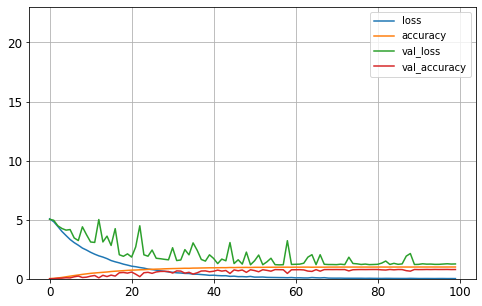

In [160]:

pd.DataFrame(history.history).plot(figsize=(8, 5)) 
plt.grid(True)
plt.gca().set_ylim(0, 23) # set the vertical range to [0-1] plt.show()

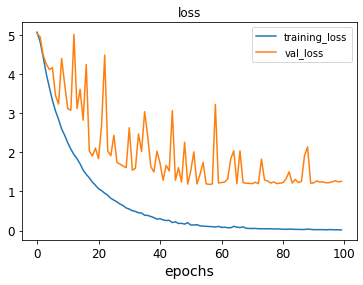

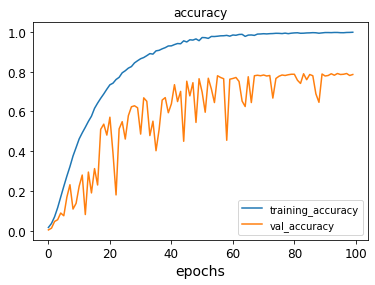

In [161]:
#plot 2 grafici
loss= history.history["loss"]
val_loss=history.history["val_loss"]

accuracy= history.history["accuracy"]
val_accuracy=history.history["val_accuracy"]

epochs=range(len(history.history["loss"]))

#plot loss

plt.plot(epochs, loss, label= "training_loss")
plt.plot(epochs, val_loss, label= "val_loss")
plt.title("loss")
plt.xlabel("epochs")
plt.legend()

#plot accuracy
plt.figure()
plt.plot(epochs, accuracy, label= "training_accuracy")
plt.plot(epochs, val_accuracy, label= "val_accuracy")
plt.title("accuracy")
plt.xlabel("epochs")
plt.legend()
